# Pymaceuticals Summary

*
*
*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st

In [2]:
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"


mouse_data = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

combined_df = study_results.merge(mouse_data, on = 'Mouse ID')
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
#Number of mice
len(combined_df['Mouse ID'].unique())

249

In [4]:
#get duplicate entries
combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#get all data for duplicated mouse
mouseG989 = combined_df[combined_df['Mouse ID'] == 'g989']
mouseG989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#remove duplicated mouse by its ID
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
#check number of mice in clean DataFrame
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = cleaned_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_Tvol = regimen_group.mean()['Tumor Volume (mm3)']
median_Tvol = regimen_group.median()['Tumor Volume (mm3)']
var_Tvol = regimen_group.var()['Tumor Volume (mm3)']
std_Tvol = regimen_group.std()['Tumor Volume (mm3)']
SEM_Tvol = regimen_group.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.

stat_summary = pd.DataFrame({'Mean Tumor Volume':mean_Tvol,'Median Tumor Volume':median_Tvol,
                             'Tumor Volume Variance':var_Tvol,'Tumor Volume Std. Dev.':std_Tvol,
                             'Tumor Volume Std. Err.':SEM_Tvol})
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
functions = {'Tumor Volume (mm3)':['mean','median','var','std','sem']}
agg_stat_summary = regimen_group.aggregate(func = functions)
# Using the aggregation method, produce the same summary statistics in a single line.
agg_stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice Tested per Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

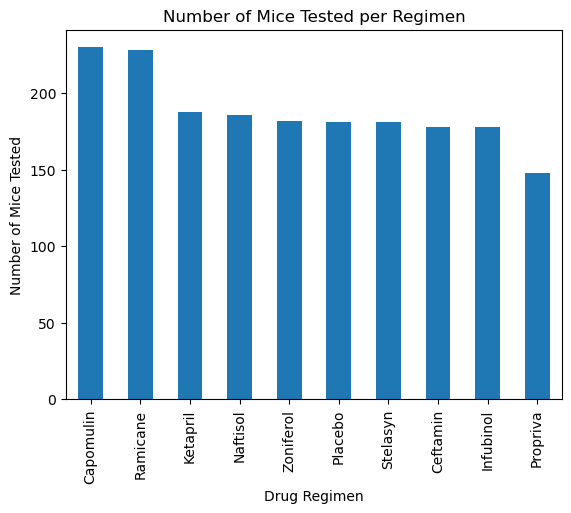

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_group.count()['Timepoint'].sort_values(ascending=False).plot(kind='bar', ylabel = 'Number of Mice Tested', 
                                                                     title = "Number of Mice Tested per Regimen")

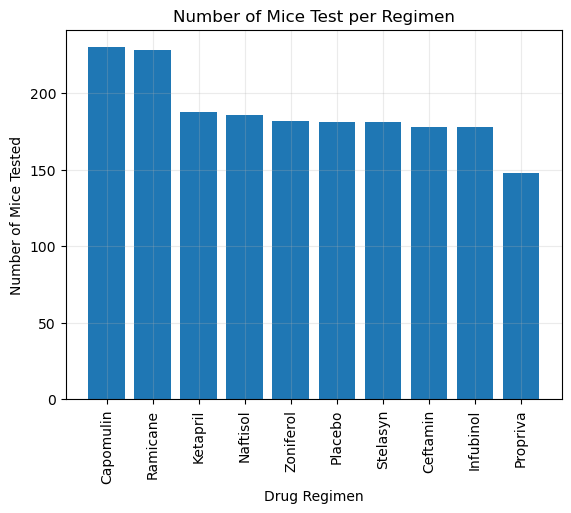

In [14]:
y_values = regimen_group.count()['Timepoint'].sort_values(ascending=False)
x_values = regimen_group.count()['Timepoint'].sort_values(ascending=False).index

plt.title('Number of Mice Test per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.grid(alpha=0.25)
plt.xticks(rotation = 90)

plt.bar(x_values, y_values)

plt.show()

<AxesSubplot:title={'center':'Male vs Female mice'}, ylabel='Sex'>

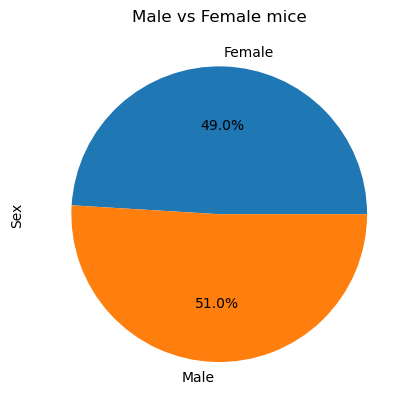

In [43]:
sex_group = cleaned_df.groupby('Sex').count()['Mouse ID']
sex_group
sex_group.plot(kind = 'pie', title = "Male vs Female mice", ylabel = 'Sex', autopct='%1.1f%%')

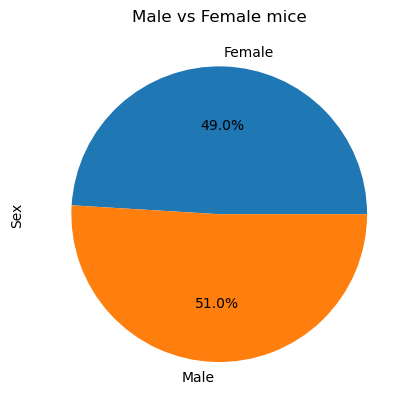

In [55]:

plt.title('Male vs Female mice')
plt.ylabel('Sex')
plt.pie(sex_group, labels = ['Female','Male'], autopct = '%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

## Line and Scatter Plots

## Correlation and Regression